# StyleGAN-Canvas: Inference

This is a notebook for inferencing trained [StyleGAN-Canvas](https://github.com/jasper-zheng/StyleGAN-Canvas) models.  

Author: Jasper Zheng (Shuoyang)

## Setup  

Please make sure you're running a GPU runtime.  

In [1]:
import torch

torch.cuda.is_available()

True

#### Clone Repo and Install Dependencies  

In [ ]:
!git clone https://github.com/jasper-zheng/StyleGAN-Canvas.git  
%cd StyleGAN-Canvas
!pip install -r ./requirements.txt

!pip uninstall jax jaxlib -y
!pip install "jax[cuda11_cudnn805]==0.3.10" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html


Download the test images and unzip them

In [ ]:
!gdown 17Ja1IoWM0FQAcQuESVRi1xAmOmB3C84m
!unzip ffhq256_preview.zip

## Deblurring Model

#### Download Trained Model

In [ ]:
!gdown 1WLOwbM9q-l091Mg2wZQ1DT4CvqBs6Pvc

#### Load the Preprocess Pipeline

In [1]:
%cd ./StyleGAN-Canvas

/content/StyleGAN-Canvas


In [2]:
import torch
import numpy as np

from torch_utils import misc
from torch_utils.ops import upfirdn2d

from torchvision.transforms import ToTensor
from PIL import Image

from torchvision.transforms.functional import to_pil_image
from torchvision.utils import make_grid
from IPython import display

from training.pipeline import Preprocess

device = torch.device('cuda')


In [3]:
op = Preprocess()
convert_tensor = ToTensor()

condition


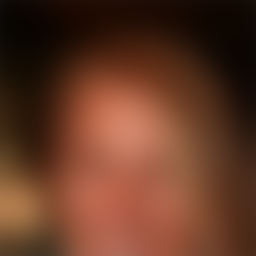

In [28]:
img = Image.open('./ffhq256_preview/00000/img00000001.png').convert("RGB")

img_tensor = convert_tensor(img).to(device).unsqueeze(0)*2-1
cond_tensor = op.preprocess_to_conditions(img_tensor)

print('condition')
display.display(to_pil_image(cond_tensor.add(1).div(2).clamp(0, 1)[0].cpu()))


#### Load the Trained Model  

In [5]:
import legacy
import dnnlib


In [6]:
network_pkl = 'network-snapshot-003700.pkl'

with dnnlib.util.open_url(network_pkl) as f:
    model = legacy.load_network_pkl(f)
    g_model = model['G'].eval().requires_grad_(False).to(device)

In [25]:
z = np.random.randn(1, 512)
z = torch.from_numpy(z).to(device)
out = g_model(z, None, cond_tensor, truncation_psi=0.5)
out = torch.nn.functional.interpolate(out, scale_factor=0.5)

ground truth / condition / generation


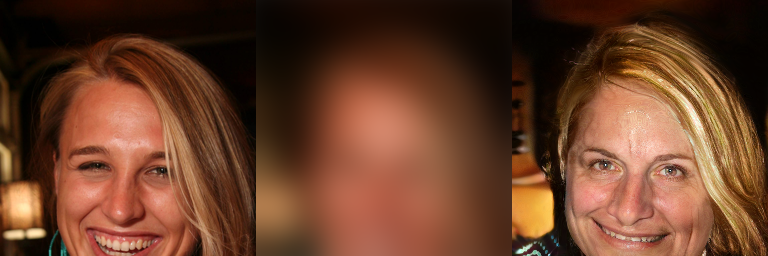

In [29]:
print('ground truth / condition / generation')
display_tensor = torch.cat((img_tensor,cond_tensor,out),dim=3)
display.display(to_pil_image(display_tensor.add(1).div(2).clamp(0, 1)[0].cpu()))